# 第 5  章 pandas  入门

## 5.1 pandas 的数据结构介绍

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

- Series

Series 是一种类似于一维数组的对象，它由一组数据（各种 NumPy 数据类型）
以及一组与之相关的数据标签（即索引）组成。仅由一组数据即可产生最简单
的 Series：

In [2]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

Series 的字符串表现形式为：索引在左边，值在右边。由于我们没有为数据指
定索引，于是会自动创建一个 0 到 N-1（N 为数据的长度）的整数型索引。你可
以通过 Series 的 values 和 index 属性获取其数组表示形式和索引对象：

In [3]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [4]:
obj.index # like range(4)

RangeIndex(start=0, stop=4, step=1)

通常，我们希望所创建的 Series 带有一个可以对各个数据点进行标记的索引：

In [5]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [6]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

与普通 NumPy 数组相比，你可以通过索引的方式选取 Series 中的单个或一组
值：

In [7]:
obj2['a']

-5

In [9]:
obj2['d'] = 6
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

['c', 'a', 'd']是索引列表，即使它包含的是字符串而不是整数。

使用 NumPy 函数或类似 NumPy 的运算（如根据布尔型数组进行过滤、标量乘
法、应用数学函数等）都会保留索引值的链接：

In [10]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [11]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [14]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

还可以将 Series 看成是一个定长的有序字典，因为它是索引值到数据值的一个
映射。它可以用在许多原本需要字典参数的函数中：

In [15]:
'b' in obj2

True

In [16]:
'e' in obj2

False

如果数据被存放在一个 Python 字典中，也可以直接通过这个字典来创建
Series：

In [17]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000,'Utah': 5000}

In [18]:
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

如果只传入一个字典，则结果 Series 中的索引就是原字典的键（有序排列）。
你可以传入排好序的字典的键以改变顺序：

In [19]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [20]:
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

在这个例子中，sdata 中跟 states 索引相匹配的那 3 个值会被找出来并放到相
应的位置上，但由于"California"所对应的 sdata 值找不到，所以其结果就为
NaN（即“非数字”（not a number），在 pandas 中，它用于表示缺失或 NA
值）。因为‘Utah’不在 states 中，它被从结果中除去。

我将使用缺失（missing）或 NA 表示缺失数据。pandas 的 isnull 和 notnull
函数可用于检测缺失数据：

In [21]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [22]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [23]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

对于许多应用而言，Series 最重要的一个功能是，它会根据运算的索引标签自
动对齐数据：

In [24]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [25]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [26]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

数据对齐功能将在后面详细讲解。如果你使用过数据库，你可以认为是类似
join 的操作。
Series 对象本身及其索引都有一个 name 属性，该属性跟 pandas 其他的关键功
能关系非常密切：

In [27]:
obj4.name = 'population'

In [28]:
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

Series 的索引可以通过赋值的方式就地修改：

In [29]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [30]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

- DataFrame

DataFrame 是一个表格型的数据结构，它含有一组有序的列，每列可以是不同
的值类型（数值、字符串、布尔值等）。DataFrame 既有行索引也有列索引，
它可以被看做由 Series 组成的字典（共用同一个索引）。DataFrame 中的数据
是以一个或多个二维块存放的（而不是列表、字典或别的一维数据结构）。有
关 DataFrame 内部的技术细节远远超出了本书所讨论的范围。

笔记：虽然 DataFrame 是以二维结构保存数据的，但你仍然可以轻松地将其表
示为更高维度的数据（层次化索引的表格型结构，这是 pandas 中许多高级数据
处理功能的关键要素，我们会在第 8 章讨论这个问题）。

创建 DataFrame 的办法有很多，最常用的一种是直接传入一个由等长列表或
NumPy 数组组成的字典：

In [32]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada','Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [33]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


如果指定了列序列，则 DataFrame 的列就会按照指定顺序进行排列：

In [34]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


如果传入的列在数据中找不到，就会在结果中产生缺失值：

In [35]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop','debt'],
index=['one', 'two', 'three', 'four','five', 'six'])

In [36]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [37]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

通过类似字典标记的方式或属性的方式，可以将 DataFrame 的列获取为一个
Series：

In [38]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [39]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

笔记：IPython 提供了类似属性的访问（即 frame2.year）和 tab 补全。
frame2[column]适用于任何列的名，但是 frame2.column 只有在列名是一个合
理的 Python 变量名时才适用。

注意，返回的 Series 拥有原 DataFrame 相同的索引，且其 name 属性也已经被
相应地设置好了。

行也可以通过位置或名称的方式进行获取，比如用 loc 属性（稍后将对此进行
详细讲解）：

In [40]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

列可以通过赋值的方式进行修改。例如，我们可以给那个空的"debt"列赋上一
个标量值或一组值：

In [41]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [42]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


将列表或数组赋值给某个列时，其长度必须跟 DataFrame 的长度相匹配。如果
赋值的是一个 Series，就会精确匹配 DataFrame 的索引，所有的空位都将被填
上缺失值：

In [43]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four','five'])

In [44]:
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


为不存在的列赋值会创建出一个新列。关键字 del 用于删除列。

作为 del 的例子，我先添加一个新的布尔值的列，state 是否为'Ohio'：

In [46]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


注意：不能用 frame2.eastern 创建新的列。

del 方法可以用来删除这列：

In [47]:
del frame2['eastern']

In [48]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

注意：通过索引方式返回的列只是相应数据的视图而已，并不是副本。因此，
对返回的 Series 所做的任何就地修改全都会反映到源 DataFrame 上。通过
Series 的 copy 方法即可指定复制列。

另一种常见的数据形式是嵌套字典：

In [3]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

如果嵌套字典传给 DataFrame，pandas 就会被解释为：外层字典的键作为列，
内层键则作为行索引：

In [4]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


你也可以使用类似 NumPy 数组的方法，对 DataFrame 进行转置（交换行和
列）：

In [5]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


内层字典的键会被合并、排序以形成最终的索引。如果明确指定了索引，则不
会这样：

In [13]:
# 写法1，报错
pd.DataFrame(pop,index=[2001, 2002, 2003])

AttributeError: 'list' object has no attribute 'astype'

In [14]:
# 写法2
pd.DataFrame(pop, columns=['Nevada','Ohio'], index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [ ]:
# 写法3
pd.DataFrame(pop,index=pd.Series([2001,2002,2003]))

由 Series 组成的字典差不多也是一样的用法：

In [56]:
pdata = {'Ohio': frame3['Ohio'][:-1],'Nevada': frame3['Nevada'][:2]}

In [57]:
pd.DataFrame(pdata)

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4


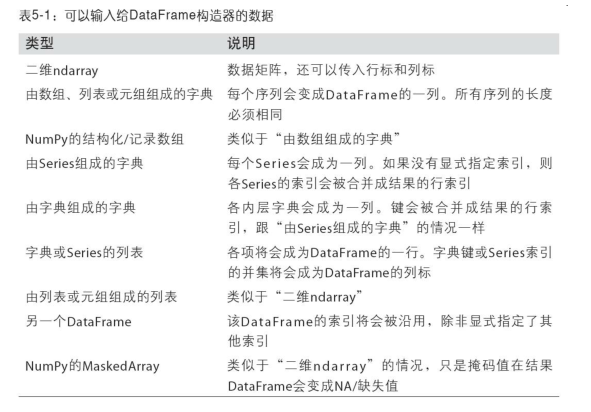

如果设置了 DataFrame 的 index 和 columns 的 name 属性，则这些信息也会被显
示出来：

In [58]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


跟 Series 一样，values 属性也会以二维 ndarray 的形式返回 DataFrame 中的
数据：

In [59]:
frame3.values

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

如果 DataFrame 各列的数据类型不同，则值数组的 dtype 就会选用能兼容所有
列的数据类型：

### 索引对象

pandas 的索引对象负责管理轴标签和其他元数据（比如轴名称等）。构建
Series 或 DataFrame 时，所用到的任何数组或其他序列的标签都会被转换成一
个 Index：

In [60]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])

In [61]:
index = obj.index

In [62]:
index

Index(['a', 'b', 'c'], dtype='object')

In [63]:
index[1:]

Index(['b', 'c'], dtype='object')

Index 对象是不可变的，因此用户不能对其进行修改：

In [64]:
index[1] = 'd' # TypeError

TypeError: Index does not support mutable operations

不可变可以使 Index 对象在多个数据结构之间安全共享：

In [66]:
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [67]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [68]:
obj2.index is labels

True

注意：虽然用户不需要经常使用 Index 的功能，但是因为一些操作会生成包含
被索引化的数据，理解它们的工作原理是很重要的。

除了类似于数组，Index 的功能也类似一个固定大小的集合：

In [69]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [70]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [71]:
'Ohio' in frame3.columns

True

In [72]:
2003 in frame3.index

False

与 python 的集合不同，pandas 的 Index 可以包含重复的标签：

In [73]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])

In [74]:
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

选择重复的标签，会显示所有的结果。
每个索引都有一些方法和属性，它们可用于设置逻辑并回答有关该索引所包含
的数据的常见问题。表 5-2 列出了这些函数。

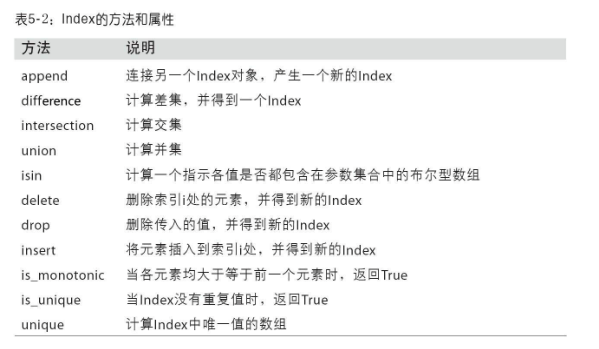

## 5.2 基本功能

本节中，我将介绍操作 Series 和 DataFrame 中的数据的基本手段。后续章节将
更加深入地挖掘 pandas 在数据分析和处理方面的功能。本书不是 pandas 库的
详尽文档，主要关注的是最重要的功能，那些不大常用的内容（也就是那些更
深奥的内容）就交给你自己去摸索吧。

### 重新索引

pandas 对象的一个重要方法是 reindex，其作用是创建一个新对象，它的数据
符合新的索引。看下面的例子：

In [75]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a','c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

用该 Series 的 reindex 将会根据新索引进行重排。如果某个索引值当前不存
在，就引入缺失值：

In [76]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

对于时间序列这样的有序数据，重新索引时可能需要做一些插值处理。method
选项即可达到此目的，例如，使用 ffill 可以实现前向值填充：

In [77]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [78]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

借助 DataFrame，reindex 可以修改（行）索引和列。只传递一个序列时，会重
新索引结果的行：

In [79]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),index=['a', 'c', 'd'],columns=['Ohio', 'Texas','California'])

In [80]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [81]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


列可以用 columns 关键字重新索引：

In [82]:
states = ['Texas', 'Utah', 'California']

In [83]:
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


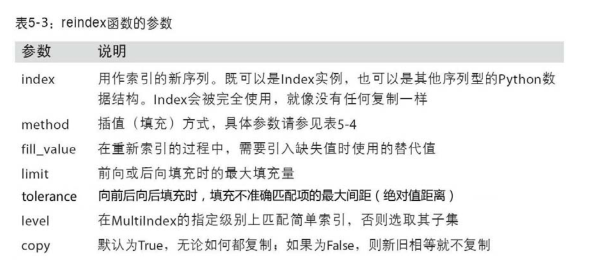

### 丢弃指定轴上的项

丢弃某条轴上的一个或多个项很简单，只要有一个索引数组或列表即可。由于
需要执行一些数据整理和集合逻辑，所以 drop 方法返回的是一个在指定轴上删
除了指定值的新对象：

In [84]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [85]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [86]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

对于 DataFrame，可以删除任意轴上的索引值。为了演示，先新建一个
DataFrame 例子：

In [87]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),index=['Ohio', 'Colorado', 'Utah', 'NewYork'],
                    columns=['one', 'two', 'three', 'four'])

In [88]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
NewYork,12,13,14,15


用标签序列调用 drop 会从行标签（axis 0）删除值：

In [89]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
NewYork,12,13,14,15


通过传递 axis=1 或 axis='columns'可以删除列的值：

In [90]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
NewYork,12,14,15


In [91]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
NewYork,12,14


许多函数，如 drop，会修改 Series 或 DataFrame 的大小或形状，可以就地修
改对象，不会返回新的对象：

In [92]:
obj.drop('c', inplace=True)
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

小心使用 inplace，它会销毁所有被删除的数据。

### 索引、选取和过滤

Series 索引（obj[...]）的工作方式类似于 NumPy 数组的索引，只不过 Series
的索引值不只是整数。下面是几个例子：

In [93]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [94]:
obj['b']

1.0

In [95]:
obj[1]

1.0

In [96]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [97]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [98]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [99]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

利用标签的切片运算与普通的 Python 切片运算不同，其末端是包含的：

In [100]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

用切片可以对 Series 的相应部分进行设置：

In [101]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

用一个值或序列对 DataFrame 进行索引其实就是获取一个或多个列：

In [102]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'NewYork'],
                    columns=['one', 'two', 'three', 'four'])

In [103]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
NewYork,12,13,14,15


In [104]:
data['two']

Ohio         1
Colorado     5
Utah         9
NewYork     13
Name: two, dtype: int32

In [105]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
NewYork,14,12


这种索引方式有几个特殊的情况。首先通过切片或布尔型数组选取数据：

In [106]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [107]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
NewYork,12,13,14,15


选取行的语法 data[:2]十分方便。向[ ]传递单一的元素或列表，就可选择
列。

另一种用法是通过布尔型 DataFrame（比如下面这个由标量比较运算得出的）
进行索引：

In [109]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
NewYork,False,False,False,False


In [110]:
data[data < 5] = 0

In [111]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
NewYork,12,13,14,15


### 用 loc 和 iloc 进行选取

对于 DataFrame 的行的标签索引，我引入了特殊的标签运算符 loc 和 iloc。它
们可以让你用类似 NumPy 的标记，使用轴标签（loc）或整数索引（iloc），从
DataFrame 选择行和列的子集。

作为一个初步示例，让我们通过标签选择一行和多列：

In [112]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

然后用 iloc 和整数进行选取：

In [113]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int32

In [114]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [115]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


这两个索引函数也适用于一个标签或多个标签的切片：

In [116]:
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [117]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
NewYork,12,13,14


所以，在 pandas 中，有多个方法可以选取和重新组合数据。对于 DataFrame，
表 5-4 进行了总结。后面会看到，还有更多的方法进行层级化索引。

笔记：在一开始设计 pandas 时，我觉得用 frame[:, col]选取列过于繁琐（也
容易出错），因为列的选择是非常常见的操作。我做了些取舍，将花式索引的
功能（标签和整数）放到了 ix 运算符中。在实践中，这会导致许多边缘情况，
数据的轴标签是整数，所以 pandas 团队决定创造 loc 和 iloc 运算符分别处理
严格基于标签和整数的索引。

ix 运算符仍然可用，但并不推荐。

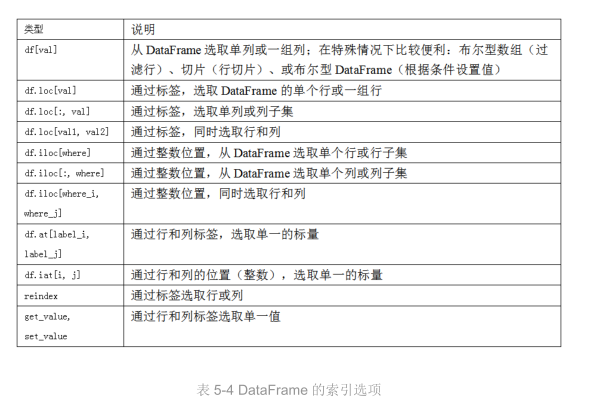

### 整数索引

处理整数索引的 pandas 对象常常难住新手，因为它与 Python 内置的列表和元
组的索引语法不同。例如，你可能不认为下面的代码会出错：

In [118]:
ser = pd.Series(np.arange(3.))

In [119]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [120]:
ser[-1]

KeyError: -1

这里，pandas 可以勉强进行整数索引，但是会导致小 bug。我们有包含 0,1,2
的索引，但是引入用户想要的东西（基于标签或位置的索引）很难：

In [121]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

另外，对于非整数索引，不会产生歧义：

In [123]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

2.0

为了进行统一，如果轴索引含有整数，数据选取总会使用标签。为了更准确，
请使用 loc（标签）或 iloc（整数）：

In [124]:
ser[:1]

0    0.0
dtype: float64

In [125]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [126]:
ser.iloc[:1]

0    0.0
dtype: float64

### 算术运算和数据对齐

pandas 最重要的一个功能是，它可以对不同索引的对象进行算术运算。在将对
象相加时，如果存在不同的索引对，则结果的索引就是该索引对的并集。对于
有数据库经验的用户，这就像在索引标签上进行自动外连接。看一个简单的例
子：

In [127]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])

In [128]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])

In [129]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [130]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [131]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

自动的数据对齐操作在不重叠的索引处引入了 NA 值。缺失值会在算术运算过程
中传播。

对于 DataFrame，对齐操作会同时发生在行和列上：

In [132]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])

In [133]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [134]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [135]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


把它们相加后将会返回一个新的 DataFrame，其索引和列为原来那两个
DataFrame 的并集：

In [136]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


因为'c'和'e'列均不在两个 DataFrame 对象中，在结果中以缺省值呈现。行也
是同样。

如果 DataFrame 对象相加，没有共用的列或行标签，结果都会是空：

In [137]:
df1 = pd.DataFrame({'A': [1, 2]})

In [138]:
df2 = pd.DataFrame({'B': [3, 4]})

In [139]:
df1

,A
0,1
1,2


In [140]:
df2

,B
0,3
1,4


In [141]:
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


### 在算术方法中填充值

在对不同索引的对象进行算术运算时，你可能希望当一个对象中某个轴标签在
另一个对象中找不到时填充一个特殊值（比如 0）：

In [142]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))

In [143]:
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))

In [144]:
df2.loc[1, 'b'] = np.nan

In [145]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [146]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


将它们相加时，没有重叠的位置就会产生 NA 值：

In [147]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


使用 df1 的 add 方法，传入 df2 以及一个 fill_value 参数：

In [148]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


表 5-5 列出了 Series 和 DataFrame 的算术方法。它们每个都有一个副本，以字
母 r 开头，它会翻转参数。因此这两个语句是等价的：

In [149]:
1 / df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250000,0.200000,0.166667,0.142857
2,0.125000,0.111111,0.100000,0.090909


In [150]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250000,0.200000,0.166667,0.142857
2,0.125000,0.111111,0.100000,0.090909


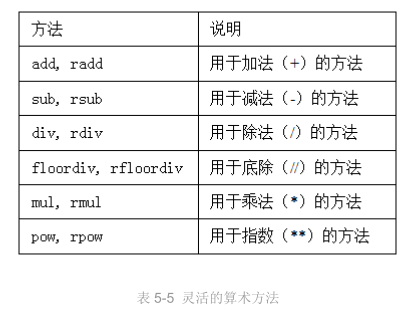

与此类似，在对 Series 或 DataFrame 重新索引时，也可以指定一个填充值：

In [151]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


### DataFrame 和 Series 之间的运算

跟不同维度的 NumPy 数组一样，DataFrame 和 Series 之间算术运算也是有明确
规定的。先来看一个具有启发性的例子，计算一个二维数组与其某行之间的
差：

In [152]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [153]:
arr[0]

array([0., 1., 2., 3.])

In [154]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

当我们从 arr 减去 arr[0]，每一行都会执行这个操作。这就叫做广播
（broadcasting），附录 A 将对此进行详细讲解。DataFrame 和 Series 之间的
运算差不多也是如此：

In [155]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [156]:
series = frame.iloc[0]

In [157]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [158]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

默认情况下，DataFrame 和 Series 之间的算术运算会将 Series 的索引匹配到
DataFrame 的列，然后沿着行一直向下广播：

In [159]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


如果某个索引值在 DataFrame 的列或 Series 的索引中找不到，则参与运算的两
个对象就会被重新索引以形成并集：

In [160]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])

In [161]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


如果你希望匹配行且在列上广播，则必须使用算术运算方法。例如：

In [162]:
series3 = frame['d']

In [163]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [164]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [165]:
frame.sub(series3, axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


传入的轴号就是希望匹配的轴。在本例中，我们的目的是匹配 DataFrame 的行
索引（axis='index' or axis=0）并进行广播。

### 函数应用和映射

NumPy 的 ufuncs（元素级数组方法）也可用于操作 pandas 对象：

In [166]:
frame = pd.DataFrame(np.random.randn(4, 3),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [167]:
frame

,b,d,e
Utah,-0.147481,0.868268,-1.214132
Ohio,0.296839,1.312137,-1.684416
Texas,1.711965,0.825628,-0.074289
Oregon,2.225115,-0.162736,0.046773


In [168]:
np.abs(frame)

,b,d,e
Utah,0.147481,0.868268,1.214132
Ohio,0.296839,1.312137,1.684416
Texas,1.711965,0.825628,0.074289
Oregon,2.225115,0.162736,0.046773


另一个常见的操作是，将函数应用到由各列或行所形成的一维数组上。
DataFrame 的 apply 方法即可实现此功能：

In [169]:
f = lambda x: x.max() - x.min()

In [170]:
frame.apply(f)

b    2.372596
d    1.474873
e    1.731188
dtype: float64

这里的函数 f，计算了一个 Series 的最大值和最小值的差，在 frame 的每列都
执行了一次。结果是一个 Series，使用 frame 的列作为索引。

如果传递 axis='columns'到 apply，这个函数会在每行执行：

In [171]:
frame.apply(f, axis='columns')

Utah      2.082401
Ohio      2.996553
Texas     1.786254
Oregon    2.387851
dtype: float64

许多最为常见的数组统计功能都被实现成 DataFrame 的方法（如 sum 和
mean），因此无需使用 apply 方法。

传递到 apply 的函数不是必须返回一个标量，还可以返回由多个值组成的
Series：

In [172]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

In [173]:
frame.apply(f)

,b,d,e
min,-0.147481,-0.162736,-1.684416
max,2.225115,1.312137,0.046773


元素级的 Python 函数也是可以用的。假如你想得到 frame 中各个浮点值的格式
化字符串，使用 applymap 即可：

In [176]:
format = lambda x: '%.2f' % x

In [177]:
frame.applymap(format)

,b,d,e
Utah,-0.15,0.87,-1.21
Ohio,0.30,1.31,-1.68
Texas,1.71,0.83,-0.07
Oregon,2.23,-0.16,0.05


之所以叫做 applymap，是因为 Series 有一个用于应用元素级函数的 map 方
法：

In [178]:
frame['e'].map(format)

Utah      -1.21
Ohio      -1.68
Texas     -0.07
Oregon     0.05
Name: e, dtype: object

### 排序和排名

根据条件对数据集排序（sorting）也是一种重要的内置运算。要对行或列索引
进行排序（按字典顺序），可使用 sort_index 方法，它将返回一个已排序的新
对象：

In [179]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])

In [180]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

对于 DataFrame，则可以根据任意一个轴上的索引进行排序：

In [185]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [182]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [183]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


数据默认是按升序排序的，但也可以降序排序：

In [184]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


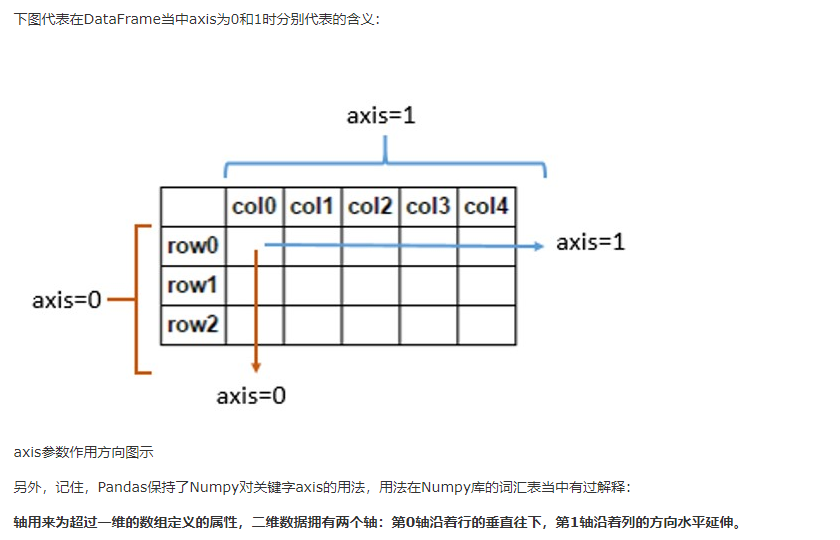

若要按值对 Series 进行排序，可使用其 sort_values 方法：

In [186]:
obj = pd.Series([4, 7, -3, 2])

In [187]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

在排序时，任何缺失值默认都会被放到 Series 的末尾：

In [188]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])

In [189]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

当排序一个 DataFrame 时，你可能希望根据一个或多个列中的值进行排序。将
一个或多个列的名字传递给 sort_values 的 by 选项即可达到该目的：

In [190]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})

In [191]:
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [192]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


要根据多个列进行排序，传入名称的列表即可：

In [193]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


排名会从 1 开始一直到数组中有效数据的数量。接下来介绍 Series 和
DataFrame 的 rank 方法。默认情况下，rank 是通过“为各组分配一个平均排
名”的方式破坏平级关系的：

In [194]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])

In [195]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

也可以根据值在原数据中出现的顺序给出排名：

In [196]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

这里，条目 0 和 2 没有使用平均排名 6.5，它们被设成了 6 和 7，因为数据中标
签 0 位于标签 2 的前面。

你也可以按降序进行排名：

In [197]:
# Assign tie values the maximum rank in the group
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

表 5-6 列出了所有用于破坏平级关系的 method 选项。DataFrame 可以在行或列
上计算排名：

In [198]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 
                      'a': [0, 1, 0,1],
                      'c': [-2, 5, 8, -2.5]})

In [199]:
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [200]:
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


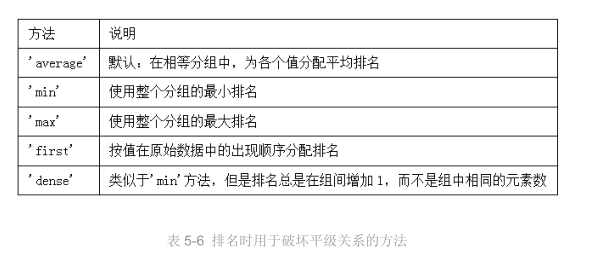

### 带有重复标签的轴索引

直到目前为止，我所介绍的所有范例都有着唯一的轴标签（索引值）。虽然许
多 pandas 函数（如 reindex）都要求标签唯一，但这并不是强制性的。我们来
看看下面这个简单的带有重复索引值的 Series：

In [201]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

索引的 is_unique 属性可以告诉你它的值是否是唯一的：

In [202]:
obj.index.is_unique

False

对于带有重复值的索引，数据选取的行为将会有些不同。如果某个索引对应多
个值，则返回一个 Series；而对应单个值的，则返回一个标量值：

In [203]:
obj['a']

a    0
a    1
dtype: int64

In [204]:
obj['c']

4

这样会使代码变复杂，因为索引的输出类型会根据标签是否有重复发生变化。

对 DataFrame 的行进行索引时也是如此：

In [205]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,-0.516662,0.166983,0.717643
a,-0.804774,-1.852072,1.139346
b,-0.484236,0.195161,0.219086
b,0.774247,1.491355,-2.344891


In [206]:
df.loc['b']

,0,1,2
b,-0.484236,0.195161,0.219086
b,0.774247,1.491355,-2.344891


## 5.3 汇总和计算描述统计

pandas 对象拥有一组常用的数学和统计方法。它们大部分都属于约简和汇总统
计，用于从 Series 中提取单个值（如 sum 或 mean）或从 DataFrame 的行或列
中提取一个 Series。跟对应的 NumPy 数组方法相比，它们都是基于没有缺失数
据的假设而构建的。看一个简单的 DataFrame：

In [207]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])

In [208]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


调用 DataFrame 的 sum 方法将会返回一个含有列的和的 Series：

In [209]:
df.sum()

one    9.25
two   -5.80
dtype: float64

传入 axis='columns'或 axis=1 将会按行进行求和运算：

In [210]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

NA 值会自动被排除，除非整个切片（这里指的是行或列）都是 NA。通过
skipna 选项可以禁用该功能：

In [211]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

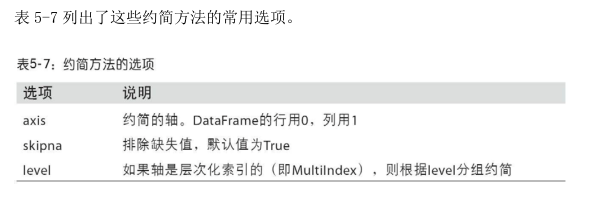

有些方法（如 idxmin 和 idxmax）返回的是间接统计（比如达到最小值或最大
值的索引）：

In [212]:
df.idxmax()

one    b
two    d
dtype: object

另一些方法则是累计型的：

In [214]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


还有一种方法，它既不是约简型也不是累计型。describe 就是一个例子，它用
于一次性产生多个汇总统计：

In [215]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


对于非数值型数据，describe 会产生另外一种汇总统计：

In [217]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [218]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

表 5-8 列出了所有与描述统计相关的方法。

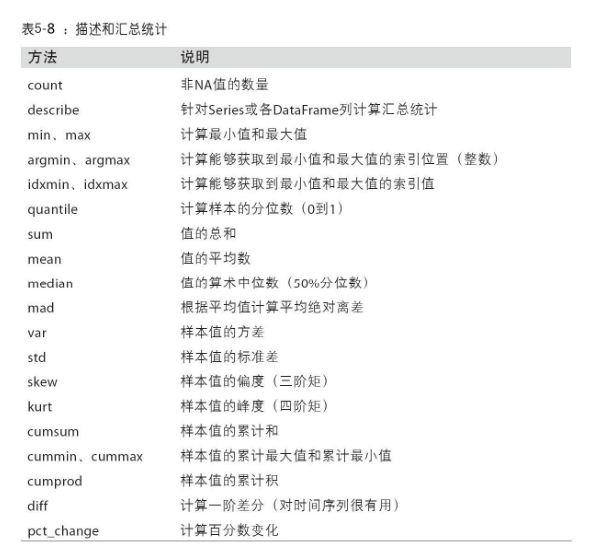

### 相关系数与协方差

有些汇总统计（如相关系数和协方差）是通过参数对计算出来的。我们来看几
个 DataFrame，它们的数据来自 Yahoo!Finance 的股票价格和成交量，使用的
是 pandas-datareader 包（可以用 conda 或 pip 安装）：

conda install pandas-datareader / pip install pandas-datareader

我使用 pandas_datareader 模块下载了一些股票数据：

In [ ]:
import pandas_datareader.data as web

all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
price = pd.DataFrame({ticker: data['Adj Close']
                      for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                       for ticker, data in all_data.items()})

注意：此时 Yahoo! Finance 已经不存在了，因为 2017 年 Yahoo!被 Verizon 收
购了。参阅 pandas-datareader 文档，可以学习最新的功能。
现在计算价格的百分数变化，时间序列的操作会在第 11 章介绍：

有墙搞不了

### 唯一值、值计数以及成员资格

还有一类方法可以从一维 Series 的值中抽取信息。看下面的例子：

In [1]:
import pandas as pd
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

第一个函数是 unique，它可以得到 Series 中的唯一值数组：

In [2]:
uniques = obj.unique()

In [3]:
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

返回的唯一值是未排序的，如果需要的话，可以对结果再次进行排序
（uniques.sort()）。相似的，value_counts 用于计算一个 Series 中各值出
现的频率：

In [4]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

为了便于查看，结果 Series 是按值频率降序排列的。value_counts 还是一个
顶级 pandas 方法，可用于任何数组或序列：

In [5]:
pd.value_counts(obj.values, sort=False)

c    3
a    3
d    1
b    2
dtype: int64

isin 用于判断矢量化集合的成员资格，可用于过滤 Series 中或 DataFrame 列
中数据的子集：

In [6]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [7]:
mask = obj.isin(['b', 'c'])

In [8]:
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [9]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

与 isin 类似的是 Index.get_indexer 方法，它可以给你一个索引数组，从可能
包含重复值的数组到另一个不同值的数组：

In [10]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])

In [11]:
unique_vals = pd.Series(['c', 'b', 'a'])

In [12]:
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

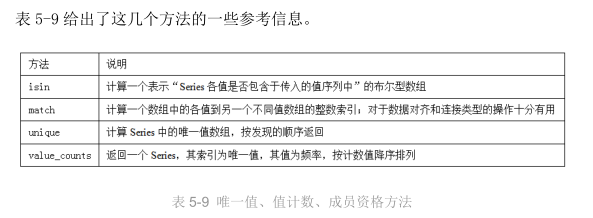

有时，你可能希望得到 DataFrame 中多个相关列的一张柱状图。例如：

In [13]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


将 pandas.value_counts 传给该 DataFrame 的 apply 函数，就会出现：

In [14]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


这里，结果中的行标签是所有列的唯一值。后面的频率值是每个列中这些值的
相应计数。